## **Nasdaq Data Link API - Analysis**

This is a financial Dataset collected from the Nasdaq data link API, which includes stock prices, economic indicators, and all other necessary columns.

In [123]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
from google.colab import userdata
# userdata.get('api_key')

In [125]:
api_metadata_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1/metadata.json'

In [126]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {
    'api_key': userdata,
    'qopts.per_page': 10000

}
json_data=requests.get(api_url, params=parameters).json()
json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2024-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2024-12-31',
    'Accrued Expenses Turnover',
    'Derived']

In [128]:
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

In [129]:
df = pd.DataFrame(data, columns=columns)
df.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [131]:
df['reportdate'] = pd.to_datetime(df['reportdate'], format='%Y-%m-%d')
df['reportdate']

,reportdate
0,2011-06-30
1,2011-09-30
2,2012-06-30
3,2012-09-30
4,2013-06-30
...,...
9995,2014-09-30
9996,2014-09-30
9997,2014-09-30
9998,2014-09-30


In [132]:
rel_columns = ['reportid', 'reportdate', 'reporttype', 'currency','amount','longname','country','region','indicator','statement' ]
df = df[rel_columns]
df.head()
df

,reportid,reportdate,reporttype,currency,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,EUR,1.048195e+01,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,EUR,8.161754e+00,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,EUR,1.078821e+01,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,EUR,9.437545e+00,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,EUR,8.755041e+00,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
...,...,...,...,...,...,...,...,...,...,...
9995,1593770752,2014-09-30,Q3,USD,8.060000e+08,Chubb Ltd,CHE,Europe,Cash and Equivalents,Balance Sheet
9996,1593770752,2014-09-30,Q3,USD,2.115900e-01,Chubb Ltd,CHE,Europe,Total Asset Turnover,Derived
9997,1593770752,2014-09-30,Q3,USD,5.330200e-02,Chubb Ltd,CHE,Europe,Revenue to Assets,Derived
9998,1593770752,2014-09-30,Q3,USD,8.051120e-01,Chubb Ltd,CHE,Europe,Return on Assets,Derived


In [133]:
df['country'].value_counts()

,count
country,
USA,3253
CYM,1556
JPN,1303
IRL,1155
BHS,898
IND,608
CHE,554
AUS,228
CAN,106


In [134]:
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'IND': 'India',
    'AUS': 'Australia',
    'CAN': 'Canada',
    'BRA': 'Brazil',
    'IDN': 'Indonesia',
    'ISR': 'Israel',
    'FIN': 'Finland',
    'CHE': 'Switzerland',
    'KOR': 'South Korea',
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'BEL': 'Belgium',
    'ITA': 'Italy',
    'HKG': 'Hong Kong',
    'DNK': 'Denmark',
    'ESP': 'Spain'
}
df['country'] = df['country'].replace(country_mapping)

df.head()

,reportid,reportdate,reporttype,currency,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,EUR,10.481948,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,EUR,8.161754,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,EUR,10.788213,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,EUR,9.437545,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,EUR,8.755041,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived


In [135]:
df.columns = ['reportid', 'reportdate', 'reporttype', 'currency','amount','companyname','country','region','indicator','statement' ]
df['country'].value_counts()

,count
country,
United States of America,3253
CYM,1556
Japan,1303
Ireland,1155
Bahamas,898
India,608
Switzerland,554
Australia,228
Canada,106


In [136]:
df['region'].value_counts()

,count
region,
Europe,3070
Latin America,2589
Asia Pacific,2226
North America,2103
Middle East,12


In [137]:
df['indicator'].value_counts()

,count
indicator,
EBITDA,291
EBITDA Margin,289
Total Assets Per Share,244
Shares Outstanding,239
Free Cash Flow Per Share,232
EPS - Net Income - Diluted,232
Revenue Per Share,230
EPS - Net Income - Basic,230
Weighted Average Shares Outstanding - Diluted,228


In [138]:
filtered_df=df[df['indicator']=='EBITDA Margin']
filtered_df.head()

,reportid,reportdate,reporttype,currency,amount,companyname,country,region,indicator,statement
662,1868192512,2011-06-30,A,AUD,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
768,1918804736,2014-06-30,A,AUD,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,AUD,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
845,1851368960,2010-12-31,A,USD,26.841546,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
889,1851369024,2010-12-31,Q4,USD,14.403761,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived


In [139]:
filtered_df.describe()

,reportid,reportdate,amount
count,2.890000e+02,289,289.000000
mean,1.747260e+09,2013-06-26 03:59:10.173010432,-353.917085
min,1.504051e+09,2010-12-31 00:00:00,-86142.858937
25%,1.569850e+09,2011-12-31 00:00:00,13.932416
50%,1.868169e+09,2013-06-30 00:00:00,17.234169
75%,1.901958e+09,2014-11-30 00:00:00,26.044164
max,1.952476e+09,2015-12-31 00:00:00,47.410116
std,1.693446e+08,NaN,5191.939353


In [140]:
filtered_df.sort_values(by='amount')

,reportid,reportdate,reporttype,currency,amount,companyname,country,region,indicator,statement
768,1918804736,2014-06-30,A,AUD,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,AUD,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
662,1868192512,2011-06-30,A,AUD,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
2203,1851368960,2010-12-31,A,CNY,-26.841528,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
2205,1868239616,2011-12-31,A,CNY,-22.854944,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
...,...,...,...,...,...,...,...,...,...,...
2048,1868192544,2011-06-30,Q2,CAD,43.551968,BCE Inc,Canada,North America,EBITDA Margin,Derived
2054,1885040144,2012-03-31,Q1,CAD,43.756366,BCE Inc,Canada,North America,EBITDA Margin,Derived
2045,1868169232,2011-03-31,Q1,CAD,44.872369,BCE Inc,Canada,North America,EBITDA Margin,Derived
2058,1885087024,2012-09-30,Q3,CAD,45.624247,BCE Inc,Canada,North America,EBITDA Margin,Derived


In [141]:
filtered_df['companyname']

,companyname
662,Immutep Ltd
768,Immutep Ltd
817,Immutep Ltd
845,Ultrapetrol (Bahamas) Ltd
889,Ultrapetrol (Bahamas) Ltd
...,...
9258,Nielsen Holdings PLC
9275,Nielsen Holdings PLC
9339,Nielsen Holdings PLC
9381,Nielsen Holdings PLC


In [157]:
filtered_df = filtered_df[filtered_df['companyname'] != 'Immutep Ltd']
filtered_df

,reportid,reportdate,reporttype,currency,amount,companyname,country,region,indicator,statement
845,1851368960,2010-12-31,A,USD,26.841546,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
889,1851369024,2010-12-31,Q4,USD,14.403761,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
937,1868169232,2011-03-31,Q1,USD,19.810706,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
983,1868192544,2011-06-30,Q2,USD,19.203670,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
1022,1868216112,2011-09-30,Q3,USD,18.774832,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
...,...,...,...,...,...,...,...,...,...,...
9258,1605697792,2015-03-31,Q1,USD,21.604938,Nielsen Holdings PLC,United States of America,Europe,EBITDA Margin,Derived
9275,1611661824,2015-06-30,Q2,USD,27.325208,Nielsen Holdings PLC,United States of America,Europe,EBITDA Margin,Derived
9339,1617691392,2015-09-30,Q3,USD,29.196604,Nielsen Holdings PLC,United States of America,Europe,EBITDA Margin,Derived
9381,1623719936,2015-12-31,A,USD,23.136747,Nielsen Holdings PLC,United States of America,Europe,EBITDA Margin,Derived


In [158]:
filtered_df.describe()

,reportid,reportdate,amount
count,2.320000e+02,232,232.000000
mean,1.710053e+09,2013-06-23 12:24:49.655172352,18.579344
min,1.504051e+09,2010-12-31 00:00:00,-19.380373
25%,1.557840e+09,2012-02-14 00:00:00,14.814277
50%,1.613693e+09,2013-06-14 12:00:00,17.594169
75%,1.885111e+09,2014-10-15 06:00:00,25.994307
max,1.952476e+09,2015-12-31 00:00:00,40.876844
std,1.689042e+08,NaN,11.149487


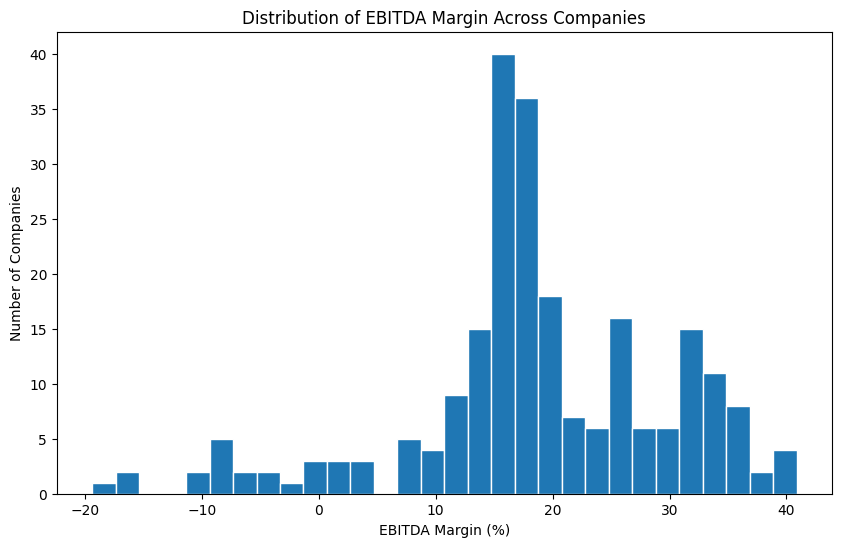

In [160]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['amount'], bins=30, edgecolor='white')
plt.xlabel('EBITDA Margin (%)')
plt.ylabel('Number of Companies')
plt.title('Distribution of EBITDA Margin Across Companies')
plt.show()

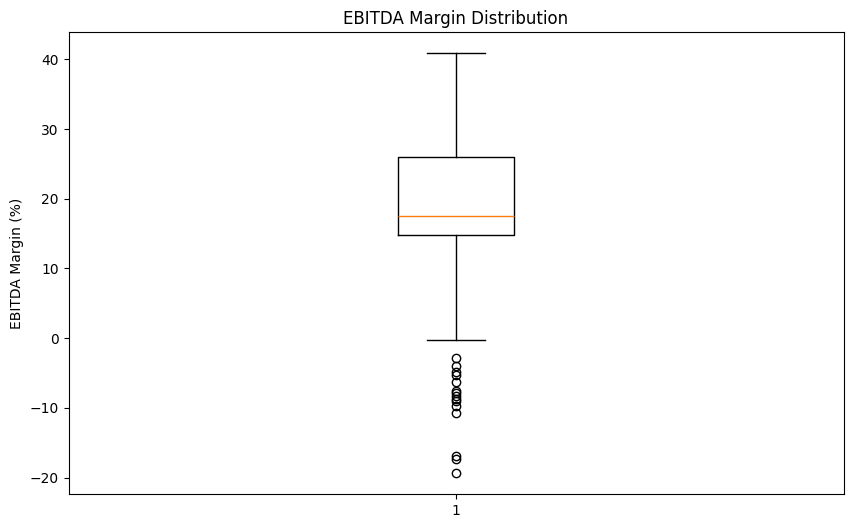

In [161]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_df['amount'])
plt.ylabel('EBITDA Margin (%)')
plt.title('EBITDA Margin Distribution')
plt.show()

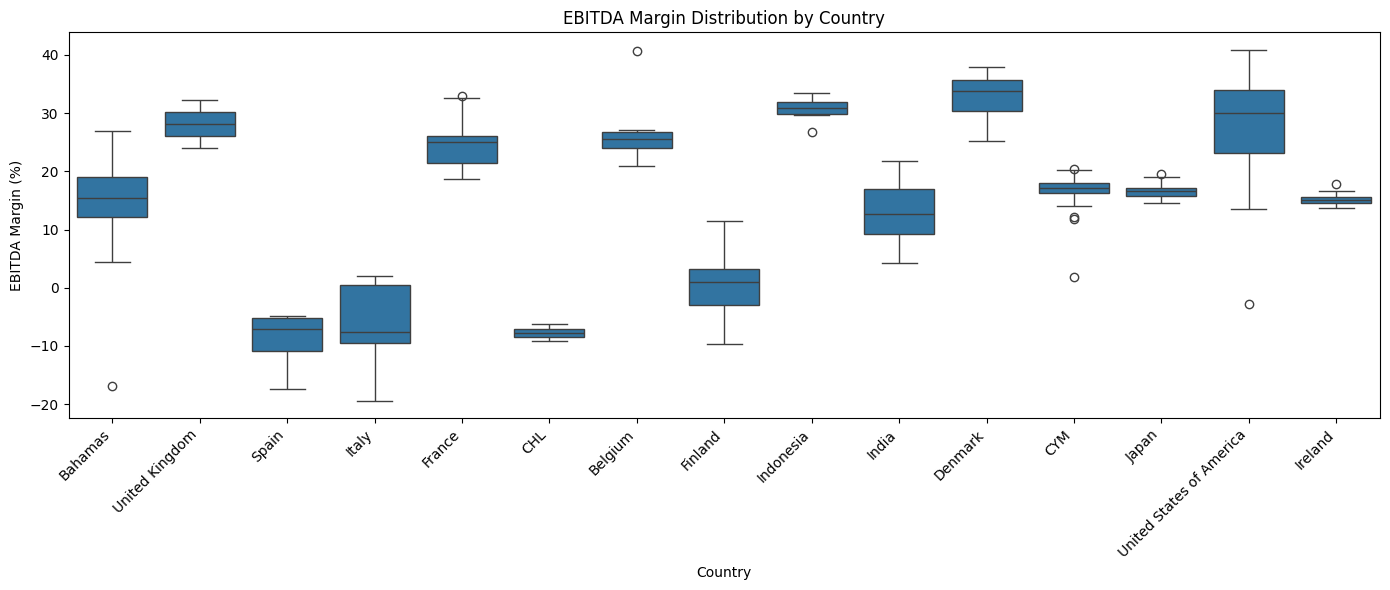

In [162]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='country', y='amount')
plt.xlabel('Country')
plt.ylabel('EBITDA Margin (%)')
plt.title('EBITDA Margin Distribution by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()